In [15]:
import pandas as pd

df1 = pd.read_csv('2015.csv')
df1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [16]:
df1.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [18]:
df1[df1.duplicated()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [19]:
df1['Region'].nunique()

10

In [20]:
df1['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [21]:
regionHappy = df1.groupby('Region').agg({'Happiness Score': 'mean'})
regionHappy

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


In [22]:
plt.figure(figsize=(15, 5))
plt.style.use('Solarize_Light2')
plots = sns.barplot(x='Region', y='Happiness Score', data=df1) 
plt.xticks(rotation=30)
plt.title('Happiness Score by regions')
plt.show()

NameError: name 'plt' is not defined

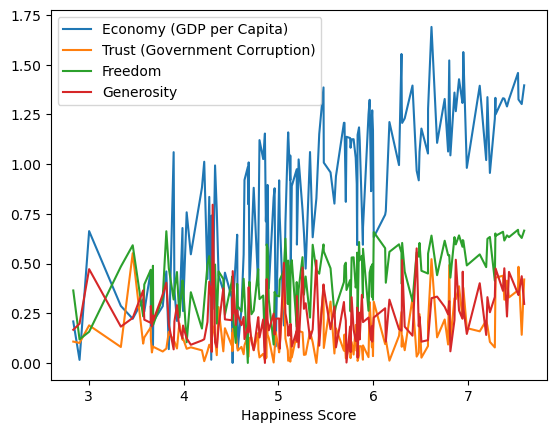

In [23]:
import matplotlib.pyplot as plt 

df1.plot(x="Happiness Score", y=["Economy (GDP per Capita)", "Trust (Government Corruption)","Freedom","Generosity"])
plt.show()

<AxesSubplot:>

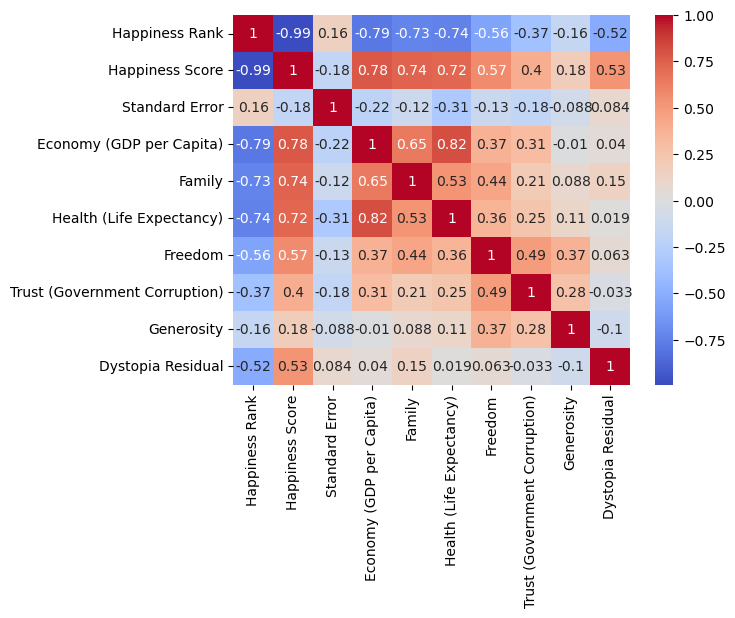

In [24]:
import seaborn as sns

corrdf1 = df1.corr()
sns.heatmap(corrdf1,cmap='coolwarm',annot=True)

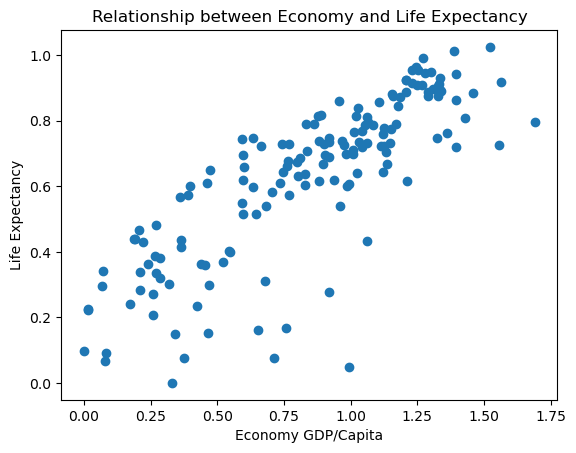

In [25]:
plt.scatter(df1['Economy (GDP per Capita)'], df1['Health (Life Expectancy)'])
plt.xlabel('Economy GDP/Capita')
plt.ylabel('Life Expectancy')
plt.title('Relationship between Economy and Life Expectancy')
plt.show()

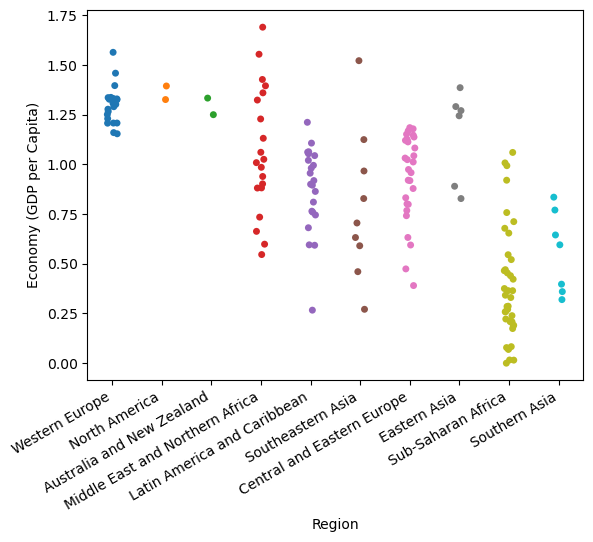

In [26]:
sns.stripplot(x="Region", y="Economy (GDP per Capita)",data=df1)
plt.xticks(rotation=30, ha='right')
plt.style.use('dark_background')
plt.show()

In [36]:
X = df1.drop(['Happiness Score', 'Country', 'Region', 'Happiness Rank'], axis=1)
Y = df1['Happiness Score']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [39]:
from sklearn.metrics import r2_score

pred = model.predict(X_test)
r2 = r2_score(Y_test, pred)
r2

0.9999999472734886

In [41]:
model.predict([[0.025, 1.67, 1.239, 0.05, 0.57, 0.691, 0.56, 1.1]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.88006283])